### Titanic Task to predict survival rate of passengers
#### '0' means the passengar won't survive and '1' means the passenger will survive.


Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [81]:
df = pd.read_csv('./Titanic-Dataset.csv', na_values="?")


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.shape

(891, 12)

### Preprocessing

Data cleaning


In [86]:
# check for empty values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 empty values, Cabin has 687, and Embarked has 2. 

1. Can replace Age and Cabin missing values with either the mean, median, bayesian formula, drop. 
    *   Fill age missing values with mean of dataset and drop missing values in Cabin and Embarked


In [87]:
# Handle age missing values
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)
df['Age'].isna().sum()

0

In [88]:
# for Embarked, let's take the mode of data
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# recheck for missing vals
df['Embarked'].isna().sum()

0

In [89]:
# for Cabin, drop the whole column as there are too many missing values
df.drop('Cabin', axis = 1, inplace=True)

In [90]:
df.shape

(891, 11)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [92]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Notice that we have 4 categorical features and two type float. 
Before modeling, we must ensure all data is of same data type and within the same scale
This means, we must apply Encoding and Scaling tecnhiques. 

One-Hot Encoding:
* Apply this for features: Sex and Embarked
* Why? because low cardinality and won't increase dimensionality of data much


In [93]:
df_encoded_low = pd.get_dummies(df, columns=['Sex', 'Embarked'])
# let's look at the encoded data
df_encoded_low.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


### Name and Ticket are both high cardinality data types with no ordinance. Therefore, after exploring the data, it is noticable that names have Prefixes like Mr./Mrs. which could be extracted for meaningful insights. Tickets with a similar pattern can indicate a family or group of friends traveling together vs. Individual passenger. 


For this reason, after feature extraction, we can apply one-hot encoding to reduce dimentionality. 

In [94]:
# Extract prefixes from 'Name'
df['Pre'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check the dist. of extracted prefixes
prefix_counts = df['Pre'].value_counts()

# Perform one-hot encoding on the extracted prefixes
df_prefix_encoded = pd.get_dummies(df['Pre'], prefix='Pre')

# Merge the encoded prefixes back to the main dataframe
df_final = pd.concat([df, df_prefix_encoded], axis=1)

# For ticket, create a group size feature based on shared 'Ticket' numbers
ticket_group_size = df.groupby('Ticket')['PassengerId'].transform('count')
df_final['TicketGroupSize'] = ticket_group_size

# Display the dist. of prefixes to check for changes
prefix_counts, df_final[['Name', 'Pre', 'TicketGroupSize']].head()


(Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 Countess      1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
 Name: Pre, dtype: int64,
                                                 Name   Pre  TicketGroupSize
 0                            Braund, Mr. Owen Harris    Mr                1
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs                1
 2                             Heikkinen, Miss. Laina  Miss                1
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs                2
 4                           Allen, Mr. William Henry    Mr                1)

In [95]:
df_prefix_encoded.columns

Index(['Pre_Capt', 'Pre_Col', 'Pre_Countess', 'Pre_Don', 'Pre_Dr',
       'Pre_Jonkheer', 'Pre_Lady', 'Pre_Major', 'Pre_Master', 'Pre_Miss',
       'Pre_Mlle', 'Pre_Mme', 'Pre_Mr', 'Pre_Mrs', 'Pre_Ms', 'Pre_Rev',
       'Pre_Sir'],
      dtype='object')

In [96]:
df_encoded_low.drop(columns=['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Name', 'Age'], inplace=True)

In [97]:
df_encoded_low.columns

Index(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [98]:
# concat sex and embarked encoded cols to final df as well
df_final = pd.concat([df_final, df_encoded_low], axis=1)

In [99]:
df_final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Pre', 'Pre_Capt', 'Pre_Col',
       'Pre_Countess', 'Pre_Don', 'Pre_Dr', 'Pre_Jonkheer', 'Pre_Lady',
       'Pre_Major', 'Pre_Master', 'Pre_Miss', 'Pre_Mlle', 'Pre_Mme', 'Pre_Mr',
       'Pre_Mrs', 'Pre_Ms', 'Pre_Rev', 'Pre_Sir', 'TicketGroupSize',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [101]:
df_final.drop(columns=['Name', 'Pre', 'Embarked', 'Sex', 'Ticket'], inplace=True)

In [102]:
df_final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Pre_Capt', 'Pre_Col', 'Pre_Countess', 'Pre_Don', 'Pre_Dr',
       'Pre_Jonkheer', 'Pre_Lady', 'Pre_Major', 'Pre_Master', 'Pre_Miss',
       'Pre_Mlle', 'Pre_Mme', 'Pre_Mr', 'Pre_Mrs', 'Pre_Ms', 'Pre_Rev',
       'Pre_Sir', 'TicketGroupSize', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Pre_Capt         891 non-null    uint8  
 8   Pre_Col          891 non-null    uint8  
 9   Pre_Countess     891 non-null    uint8  
 10  Pre_Don          891 non-null    uint8  
 11  Pre_Dr           891 non-null    uint8  
 12  Pre_Jonkheer     891 non-null    uint8  
 13  Pre_Lady         891 non-null    uint8  
 14  Pre_Major        891 non-null    uint8  
 15  Pre_Master       891 non-null    uint8  
 16  Pre_Miss         891 non-null    uint8  
 17  Pre_Mlle        

Now that we have encoded all categorical data to numerical, We have the following dtypes "dtypes: float64(4), int64(11), uint8(22)"  let's see if we need to remove outliers and scale the data before model fitting. This is so that all data is standardized for faster performance

In [104]:
from sklearn.preprocessing import StandardScaler

# ensure uniform numerical data type
df_final = df_final.astype(float)

In [105]:
# identify outliers and remove them using IQR for each column
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1

# define an outlier as being outside of (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)
outliers = (df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))

# Remove outliers - This step will remove any row with at least one outlier
df_no_outliers = df_final[~(outliers).any(axis=1)]

In [106]:
# scale the data after removing outliers
sc = StandardScaler()
sc_df = sc.fit_transform(df_no_outliers)

In [107]:
# let's update dataframe after scaling
df_scaled = pd.DataFrame(sc_df, columns=df_no_outliers.columns)

# display final dataframe vs. initial
df_scaled.shape, df_final.shape

((324, 30), (891, 30))

In [111]:
# save progress to csv
path = './df_scaled.csv'
df_scaled.to_csv(path, index=False)

path

'./df_scaled.csv'

### Data Visualization for outlier before and after

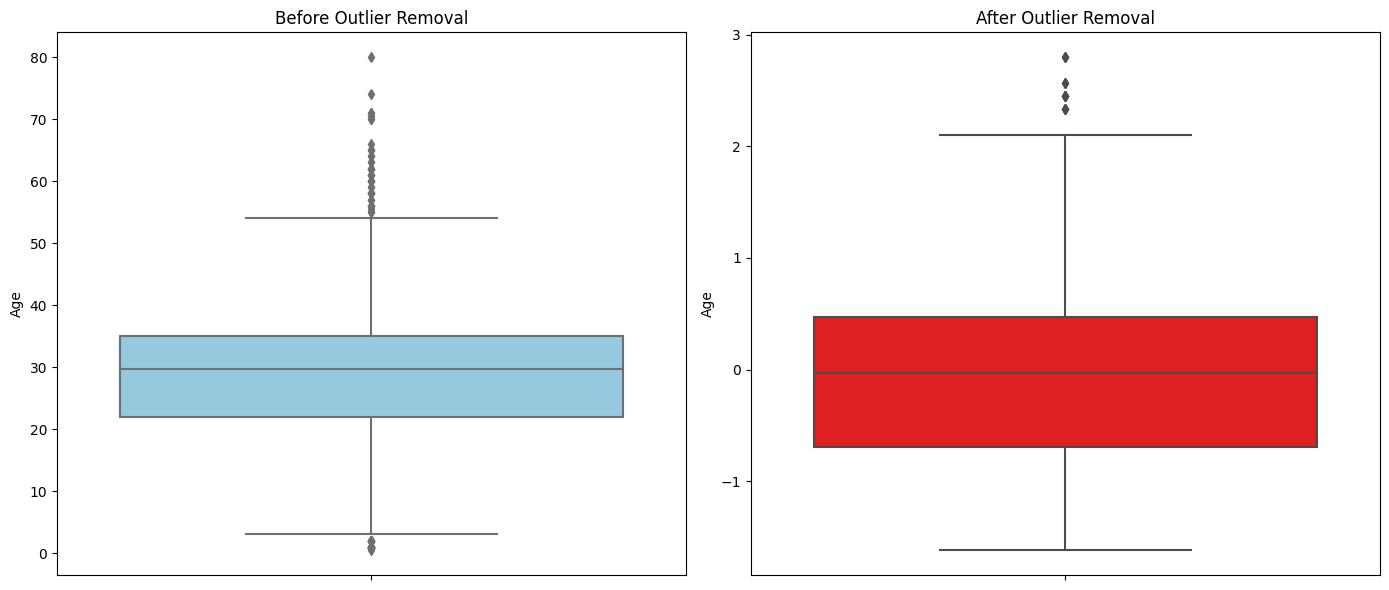

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# let's use 'Age' as it's a common column with potential outliers
column_to_plot = 'Age'

# Plotting before and after outlier removal for the 'Age' column
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot before outlier removal
sns.boxplot(y=df_final[column_to_plot], ax=axes[0], color='skyblue')
axes[0].set_title('Before Outlier Removal')

# Boxplot after outlier removal
sns.boxplot(y=df_scaled[column_to_plot], ax=axes[1], color='red')
axes[1].set_title('After Outlier Removal')

plt.tight_layout()
plt.show()


### Model Fitting

In [3]:
# load clean data
data = pd.read_csv('./df_scaled.csv')

In [9]:
# separate features from target
X = data.drop('Survived', axis=1)
y = data['Survived']
y = y = y.astype(int)
X.shape, y.shape

((324, 29), (324,))

Split data into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# explore split
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((259, 29), (259,)), ((65, 29), (65,)))

### Train Model

We know that this is a binary classification problem since survived/no survived are the only target variables. For this reason, let's explore a linear model. For this case, Decision Tree Classifier may be a good fit as it is easy to interpret. 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(random_state=42)

# let's run cross validation for hyperparam tuning with 5 k folds
cval = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy scores of each k fold: ", cval)
print("Avg. cv score: {:.2f}".format(cval.mean()))

Accuracy scores of each k fold:  [0.84615385 0.71153846 0.78846154 0.75       0.78431373]
Avg. cv score: 0.78


In [13]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score

# predict on test set
y_pred = dt.predict(X_test)

# Calculate measurable metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


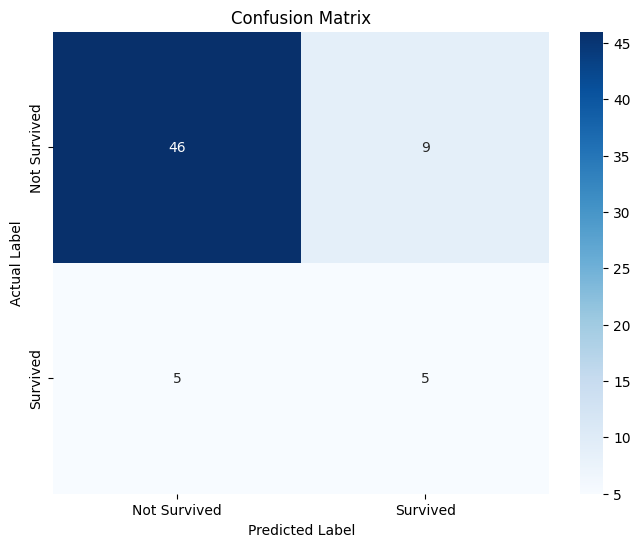

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


From the results gathered, decision tree after cross validation, we can see that it is 78% accurate at correctly predicting survived vs. not survived passengers based on the feature set. 

#### Let's explore another binary classification model: Logistic Regression

Model Fitting

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [22]:
# predict on test set
y_pred_lr = lr.predict(X_test)

Evaluate model and visualize results via confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

# calculate measurable metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

Accuracy: 0.78


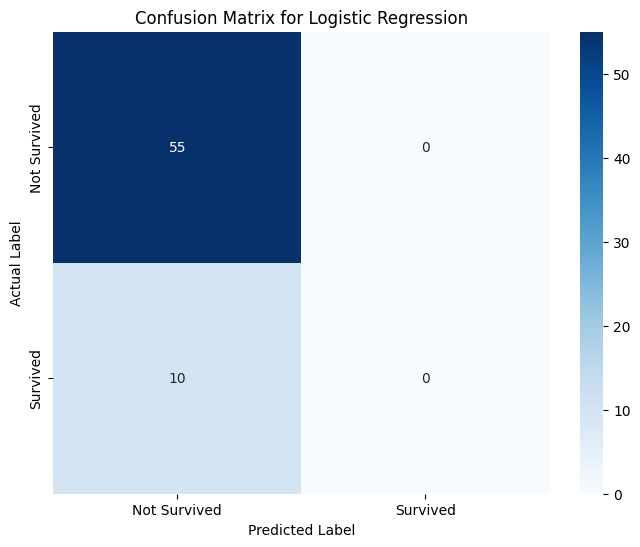

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


As seen in logistic regression's confusion matrix, it has plenty of false negatives, hence I think for this problem, decision tree is much more accuracte. 